### Final Project Report STAT 201 Group 4
# Gender Proportion Inference of Suicide Attempts Across Primary Education Level in Shandong, China

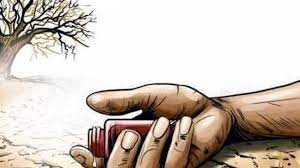

### Group 4: Eric Wei, Laksh Agarwal, Marie Samantha Fidelia, Yiting Sun

## Introduction

In recent years, suicide has become a worldwide public health concern with far-reaching consequences for individuals, community and even the entire society. After accounting for changes in population size and age demographics, there has been a 16% increase in the suicide rate between 2011 and 2022, resulting in an elevation from 12.3 to 14.4 fatalities per 100,000 individuals (Saunders & Panchal, 2023). Therefore, it is important to learn about the factors, triggers, and patterns related to suicide attempts so that they can be prevented effectively. In this project, we will focus on the effect of education levels on suicide risks. We will compare the proportion of suicide rates between primary and secondary education levels for females. A similar research has been done and demonstrated that “Men with a high school education were twice as likely to die by suicide compared with those with a college degree in 2014” (Phillips & Hempstead, 2017); however, we want to examine whether the same pattern will also apply to females.

The data set we chose is “Suicide Attempts in Shandong, China” from Kaggle. This data set records the information of suicide victims from 2009 to 2011 in Shandong, China. The local parameter of interest is the difference in proportion of suicide rate between two categories; which are primary and secondary education level. We will also calculate the standard deviation to investigate the sample variation.

To get started with our project, we will apply statistical inference to a dataset that was obtained from: https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china

The dataset is downloaded in a comma separated format. It contains 2571 rows of data, with 11 columns in which four are continuous variables (person_id, year, month, and age), and the rest are distinct variables. Several missing values are interpreted with an "unknown" label in the dataset. The aspects of education levels include: Iliterate, Primary (Grade 1 - 6), Secondary (Grade 7 - 12), and Tertiary (Bachelor's Degrees, Master's Degrees, and Doctoral Degrees). The following two variables will be considered for use in our inference:

* Sex ("Male"/"Female")
* Education ("Iliterate"/"Primary"/"Secondary"/"Tertiary")

#### Research Question: 
##### Is there a difference between the proportion of the suicide rates of women and men with primary education level?

## Methods and Results

### Reading Our Dataset

We can start by importing the necessary libraries for our modelling

In [1]:
library(tidyverse) # For data cleaning, plotting, etc
library(knitr)     # For table centering and justify

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Let's read the chosen csv data with its column names into R 

In [2]:
suicide_data <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS0cVcc1RNtcHpY9CnuzkvM_auEuA5HloYBi9MEciadHj4R3uNXNt7ORJwHSJjod85rHzIyigMmVIGy/pub?gid=1118541132&single=true&output=csv", col_names = TRUE) |>
                select(-Number)

glimpse(suicide_data)

Rows: 2571 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Hospitalised, Died, Urban, Sex, Education, Occupation, method
dbl (5): Number, Person_ID, Year, Month, Age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,571
Columns: 11
$ Person_ID    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Hospitalised <chr> "yes", "no", "no", "no", "yes", "no", "no", "yes", "no", …
$ Died         <chr> "no", "yes", "yes", "yes", "no", "yes", "yes", "no", "yes…
$ Urban        <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no", "no…
$ Year         <dbl> 2010, 2009, 2010, 2011, 2009, 2009, 2010, 2010, 2010, 201…
$ Month        <dbl> 12, 3, 2, 1, 8, 11, 1, 10, 7, 1, 11, 3, 6, 1, 12, 2, 6, 5…
$ Sex          <chr> "female", "male", "male", "male", "male", "male", "female…
$ Age          <dbl> 39, 83, 60, 73, 51, 62, 90, 54, 66, 30, 77, 77, 79, 42, 6…
$ Education    <chr> "Secondary", "Primary", "Primary", "Primary", "Secondary"…
$ Occupation   <chr> "household", "farming", "farming", "farming", "farming", …
$ method       <chr> "Other poison", "Hanging", "Hanging", "Hanging", "Pestici…


### Cleaning and Wrangling Data Into Tidy Format

In [3]:
# Check for missing values in our data
missing <- filter(suicide_data, Education == "unknown") |>
           summarize(n = n())


<div align="center"> Table 1.1: Amount of Rows with Unknown Value 

|   n|
|---:|
| 80 | 

</div>

The tibble above shows that 80 rows are found to be having missing values of education.

Let's select the columns we need and then make sure that we filter out any missing values contained in our data

In [4]:
filtered_data <- suicide_data |>
                 select(Sex, Education) |>
                 filter(Education != "unknown")

<div align="center"> Table 1.2: Head of Filtered Data

<table style='margin-left: auto; margin-right: auto;'>
 <thead>
  <tr>
   <th style="text-align:center;"> Sex </th>
   <th style="text-align:center;"> Education </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> female </td>
   <td style="text-align:center;"> Secondary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Secondary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Iliterate </td>
  </tr>
</tbody>
</table>

</div>

### Visualizing the Data

Now let's visualize the data that we got!

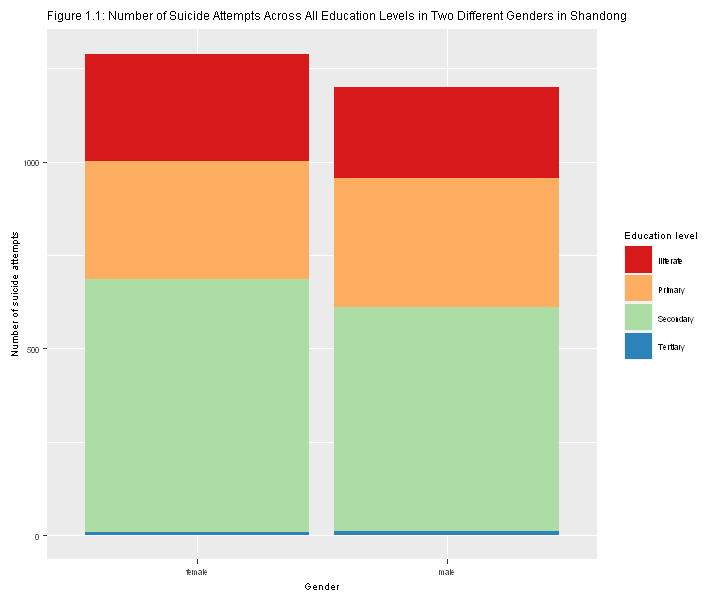

In [5]:
options(repr.plot.width = 6, repr.plot.height = 5)

bar_plot <- filtered_data |>
            ggplot(aes(x = Sex, y = 1, fill = Education)) + 
            geom_bar(stat = "identity", position = "stack") + 
            xlab("Gender") +
            ylab("Number of suicide attempts") +
            labs(fill = "Education level") +
            ggtitle("Figure 1.1: Number of Suicide Attempts Across All Education Levels in Two Different Genders in Shandong") +
            theme(text = element_text(size = 6)) +
            scale_fill_brewer(palette = 'Spectral')
bar_plot

Since students with primary education are our parameters of interest, we will narrow our findings down and select just students with primary education as a part of our research.

### Computing Estimates

In [12]:
prop_table <- filtered_data |>
              filter(Education == "Primary") |>
              summarize(Education = "Primary", n = n(),
              prop_male = sum(Sex == "male")/n,
              prop_female = sum(Sex == "female")/n, 
              total_prop = prop_male + prop_female) 
prop_table


Education,n,prop_male,prop_female,total_prop
<chr>,<int>,<dbl>,<dbl>,<dbl>
Primary,659,0.5235205,0.4764795,1


Let's create a visual representation of the above statistics to show a clear comparison!

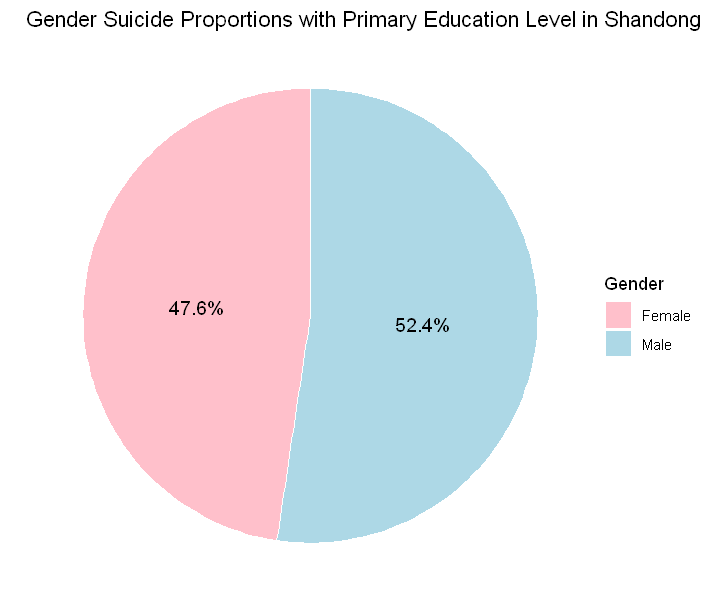

In [25]:
# Create a data frame for male and female proportions
gender_props <- data.frame(
  Gender = c("Male", "Female"),
  Proportion = c(prop_table$prop_male, prop_table$prop_female)
)

# Plotting the pie chart using ggplot2
props_chart <- ggplot(gender_props, aes(x = "", y = Proportion, fill = Gender)) +
  			   geom_bar(stat = "identity", width = 1, color = "white") +
  			   coord_polar("y") +
  			   theme_void() +
  			   ggtitle("Gender Suicide Proportions with Primary Education Level in Shandong") +
  			   scale_fill_manual(values = c("pink", "lightblue")) +
   			   geom_text(aes(label = sprintf("%1.1f%%", Proportion * 100)), position = position_stack(vjust = 0.5), size = 4)
props_chart

From the sample that we had, it appears that men with primary education have a higher proportion of suicide attempts than women with primary education in Shandong, China, with a value of around 52.4% of the population.

## Discussion

* Summarize what you found, and the implications/impact of your findings.
* Discuss whether your results were what you expected to find.
* Discuss future questions/research this study could lead to.

## References

Heather Saunders and Nirmita Panchal. (2023, August 21). A look at the latest suicide data and change over the last decade. *KFF*. https://www.kff.org/mental-health/issue-brief/a-look-at-the-latest-suicide-data-and-change-over-the-last-decade/

Phillips, J. A., & Hempstead, K. (2017). Differences in U.S. suicide rates by educational attainment, 2000–2014. *American Journal of Preventive Medicine, 53(4)*. https://doi.org/10.1016/j.amepre.2017.04.010

Scholaro Database. (2023). Education system in China. *China Education System. (n.d.)*. https://www.scholaro.com/db/Countries/China/Education-System

Singh, U. (2023, May 6). *Suicide attempts in Shandong, China*. Kaggle. https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china